In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_json('recipies.json')
pd.set_option('display.max_colwidth', None)

## EDA

### 1. Dataset size

In [2]:
print('Dataset Size: ',data_df.shape)
data_df.head()

Dataset Size:  (39774, 3)


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]"


### 2. Checking Null values

In [3]:
null_values = data_df.isnull().sum()
null_values
print('No null values')

No null values


### 3. No. of cuisine types

No.of cuisine types: 20 
Cuisine distribution:
 italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


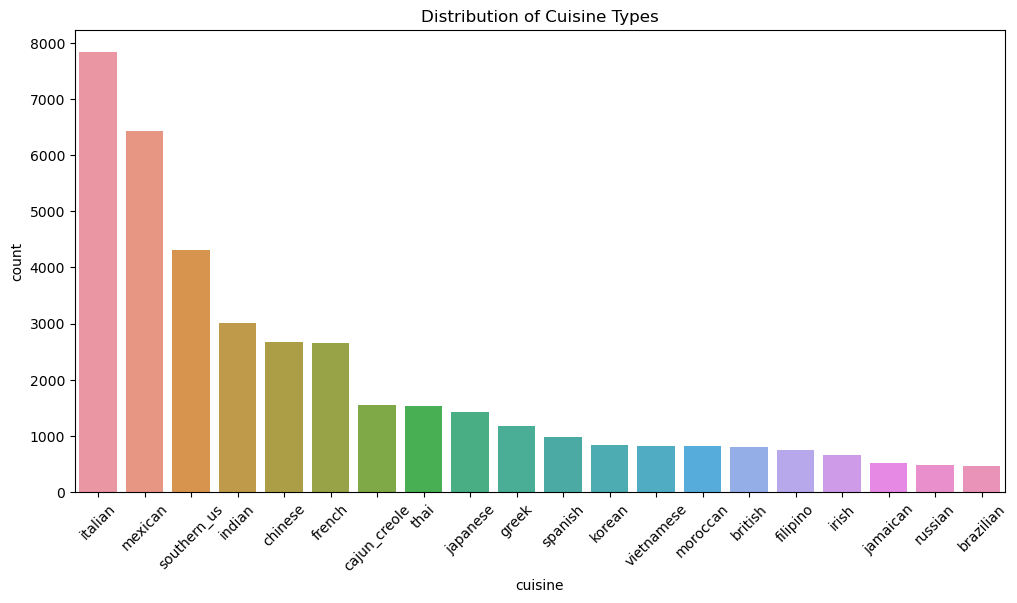

In [4]:
cuisine_types = data_df['cuisine'].value_counts()
print('No.of cuisine types:', len(cuisine_types),'\nCuisine distribution:\n',cuisine_types)

plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine', data=data_df, order=data_df['cuisine'].value_counts().index)
plt.title('Distribution of Cuisine Types')
plt.xticks(rotation=45)
plt.show()

###  Distribution of ingredients

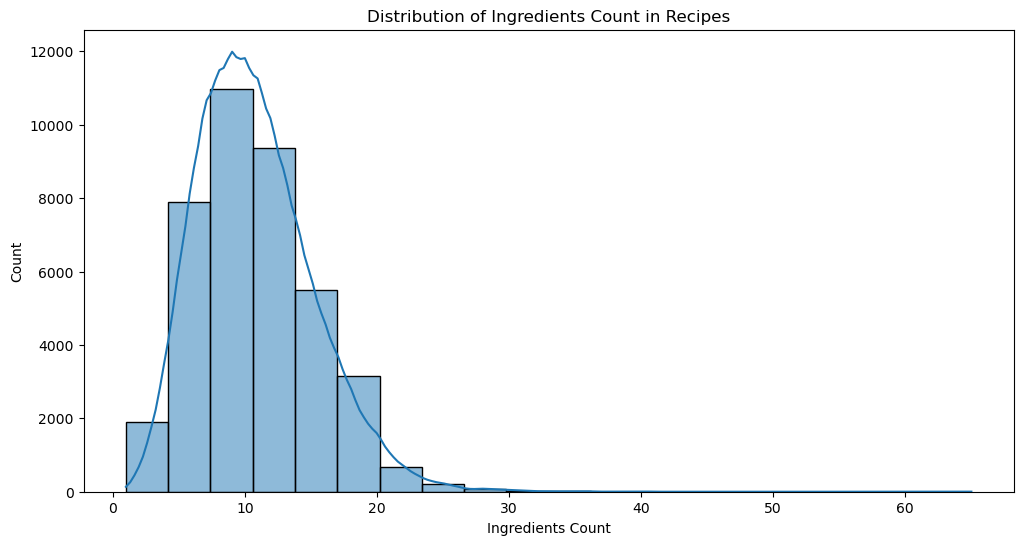

In [5]:
data_df['ingredients_count'] = data_df['ingredients'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data_df['ingredients_count'], bins=20, kde=True)
plt.title('Distribution of Ingredients Count in Recipes')
plt.xlabel('Ingredients Count')
plt.show()

### 4. Frequency of the ingredients

In [6]:
from collections import Counter
all_ingredients = [ingredient for recipe in data_df['ingredients'] for ingredient in recipe]
ingredient_counts = Counter(all_ingredients)

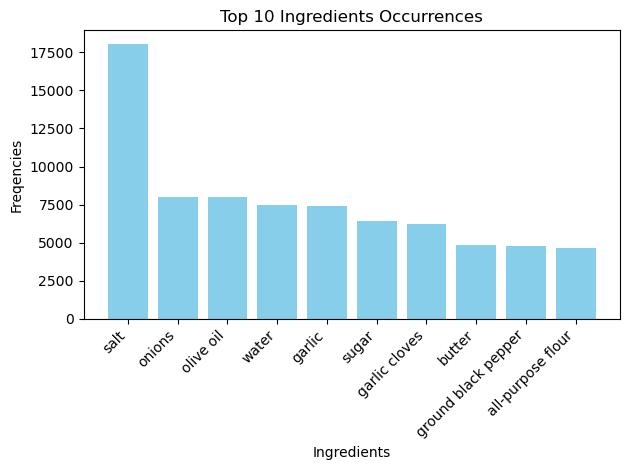

In [7]:
top_n = 10
top_ingredients = [item[0] for item in ingredient_counts.most_common(top_n)]
top_counts = [item[1] for item in ingredient_counts.most_common(top_n)]

# Plot the histogram
plt.bar(top_ingredients, top_counts, color='skyblue')
plt.xlabel('Ingredients')
plt.ylabel('Freqencies')
plt.title(f'Top {top_n} Ingredients Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Model Selection

### Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
# list of ingredients to a string
data_df['ingredients_str'] = data_df['ingredients'].apply(lambda x: ' '.join(x))

data_df = data_df.sample(frac=1, random_state=42).reset_index(drop=True)

# train-test split 80-20
x_train, x_test, y_train, y_test = train_test_split(data_df['ingredients_str'], data_df['cuisine'], test_size=0.2, random_state=42)

### 1. Multinomial Naive Bayes with Term Frequency-Inverse Document Frequency

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# representation text data in TF-IDF
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Training a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(x_train_tfidf, y_train)

#  Fitting the test set
predictions = classifier.predict(x_test_tfidf)

# Performance evaluation
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')

print('Confusion matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')

Confusion matrix:
[[  15    0    4    0    0    2    0    2    0   22    0    0    0   21
     0    0   22    1    7    0]
 [   0    9    0    1    0   37    0    7    1   28    0    0    0    8
     0    0   79    0    0    0]
 [   0    0  181    0    0    7    0    0    0   50    0    0    0   29
     0    0   67    0    0    0]
 [   0    0    0  493    0    2    0    3    0    8    0    0    0    8
     0    0   15    0    6    2]
 [   1    0    1   57   16    2    0    5    0   10    0    2    0   20
     0    0   22    0    8    0]
 [   0    1    2    0    0  206    1    4    0  218    0    0    0   10
     1    0   66    0    1    0]
 [   0    0    1    1    0    6   88    7    0  104    0    0    0   13
     0    0   10    0    0    0]
 [   0    0    0    4    0    2    1  569    0   16    0    0    0   17
     1    0   15    0    7    0]
 [   0    0    0    4    1   17    1    6    9   35    0    0    0    9
     0    0   62    0    0    0]
 [   0    0    1    1    0   72    1 

### 2. Multinomial Naive Bayes with bag-of-words

In [10]:
# bag-of-words representation of text data
vectorizer = CountVectorizer()
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)

# Training a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(x_train_bow, y_train)

# Fitting the test set
predictions = classifier.predict(x_test_bow)

# performance evaluation
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')  # Using 'weighted' average for multiclass problem

print('Confusion matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')

Confusion matrix:
[[  31    2   11    0    1    2    0    3    0    8    0    0    1    6
     0    1   12   11    6    1]
 [   0   68    3    0    1   25    0    5    6    6    1    1    0    3
     0    4   45    2    0    0]
 [   0    5  257    0    0   10    1    0    1    9    0    0    0    7
     0    4   37    2    1    0]
 [   0    3    1  473    5    3    0    1    1    1    1    6    6    5
     0    1   11    0   13    6]
 [   5    1    2   39   51    4    0    3    0    4    0    2    0    3
     0    0   17    1    7    5]
 [   2   22   10    0    1  280   10    2    7   94    1    0    0    9
     6    7   47   11    1    0]
 [   0    4    5    0    0    6  158    3    0   32    0    0    1    1
     8    0    6    5    1    0]
 [   1    4    2    3    0    3    4  557    0    4    1    1    2    8
    10    0   16    1   14    1]
 [   1    8    3    0    3   18    4    4   50    8    0    0    1    2
     3    1   36    2    0    0]
 [   2   22   19    2    0  126   32 

### 3. Multinomial Naive Bayes with bag-of-words & GridearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'alpha': [0.1, 0.5, 1.0],
}

nb_classifier = MultinomialNB()

grid_search = GridSearchCV(nb_classifier, grid_params, cv=5, scoring='accuracy')
grid_search.fit(x_train_bow, y_train)

# best parameters
best_params = grid_search.best_params_

# # Training a Naive Bayes classifier
best_classifier = MultinomialNB(alpha=best_params['alpha'])
best_classifier.fit(x_train_bow, y_train)

# Predictions
predictions = best_classifier.predict(x_test_bow)

# Performance evaluation
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')

print('best alpha:',best_params['alpha'])
print('Confusion matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')


best alpha: 0.5
Confusion matrix:
[[  44    2    7    0    1    4    0    1    0    7    2    0    1    5
     0    1    8    7    5    1]
 [   0   83    3    0    1   20    0    5   12    4    1    1    0    2
     0    4   32    2    0    0]
 [   0    9  258    0    0    7    1    0    2    9    1    0    0    6
     0   10   28    2    1    0]
 [   0    5    1  462    8    2    0    1    2    0    2    9   11    5
     0    1    8    0   15    5]
 [   5    4    2   30   66    2    0    2    0    3    0    2    1    2
     0    2   12    2    5    4]
 [   2   35   11    0    1  270   13    1   11   75    1    0    0    9
     7   15   43   15    1    0]
 [   0    5    6    0    0    5  166    2    0   21    0    0    1    1
    10    1    5    6    1    0]
 [   2    5    2    2    1    4    5  549    2    3    3    1    2    8
    14    2   11    1   14    1]
 [   1   11    2    0    4   13    5    2   64    7    1    0    0    2
     3    2   25    2    0    0]
 [   3   31   20    2

### 4. RandomForestClassifier with Term Frequency-Inverse Document Frequency

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=90, random_state=42)
rf_classifier.fit(x_train_tfidf, y_train)

# Predictions
predictions = rf_classifier.predict(x_test_tfidf)

# Performance evaluation
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')

print('Confusion matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')

Confusion matrix:
[[  33    0    3    0    2    4    0    2    0   15    1    0    0   23
     0    0    9    1    3    0]
 [   1   39    1    1    0   27    1    2    6   29    0    0    0    2
     0    0   61    0    0    0]
 [   0    0  232    1    0    7    0    0    0   27    0    0    0   21
     0    1   44    1    0    0]
 [   0    0    0  467    4    5    0    4    0   11    0    9    9    9
     0    0   11    0    6    2]
 [   1    0    0   32   66    2    0    7    0   10    0    0    0    9
     0    0   13    0    3    1]
 [   0    2    2    0    0  251    1    4    3  185    1    1    0   11
     2    0   45    2    0    0]
 [   0    0    0    0    0    3  133    2    0   75    0    2    0    8
     3    0    4    0    0    0]
 [   0    0    1    0    0    0    4  568    0   11    0    1    0   29
     4    0    8    0    6    0]
 [   0    4    0    0    0   13    1    4   49   22    0    1    0    4
     0    0   46    0    0    0]
 [   0    1    3    2    0   45   11 

### 5. RandomForestClassifier with bag-of-words

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier2 = RandomForestClassifier(n_estimators=100, max_depth=90, random_state=42)
rf_classifier2.fit(x_train_bow, y_train)

# Predictions
predictions = rf_classifier2.predict(x_test_bow)

# Performance evaluation
conf_matrix = confusion_matrix(y_test, predictions)
test_accuracy = accuracy_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions, average='weighted')

print('Test Confusion matrix:')
print(conf_matrix)

predictions = rf_classifier2.predict(x_train_bow)

# Performance evaluation
conf_matrix = confusion_matrix(y_train, predictions)
accuracy = accuracy_score(y_train, predictions)
f1 = f1_score(y_train, predictions, average='weighted')

print('Train Confusion matrix:')
print(conf_matrix)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1-Score: {test_f1}')

print(f'Train Accuracy: {accuracy}')
print(f'Train F1-Score: {f1}')


Test Confusion matrix:
[[  34    1    2    0    3    4    0    3    0   15    1    0    0   21
     0    0    8    2    2    0]
 [   0   43    0    1    1   27    0    5    5   26    1    0    0    0
     0    0   61    0    0    0]
 [   0    0  234    2    0    9    0    1    0   31    0    0    0   19
     0    2   36    0    0    0]
 [   0    0    0  473    6    3    0    4    0    7    1    9    4   10
     0    1   11    0    4    4]
 [   1    1    0   31   76    2    0    4    0    6    0    0    0   10
     0    0   12    0    1    0]
 [   0    3    2    0    0  268    0    2    3  172    0    1    0   13
     2    0   43    1    0    0]
 [   0    0    1    1    0    4  135    3    0   72    0    0    0    7
     3    0    4    0    0    0]
 [   0    0    2    2    0    0    3  569    0    8    0    0    1   32
     4    0    4    0    7    0]
 [   0    4    1    0    0   19    1    6   47   21    0    1    0    3
     0    0   41    0    0    0]
 [   1    0    2    0    0   50 

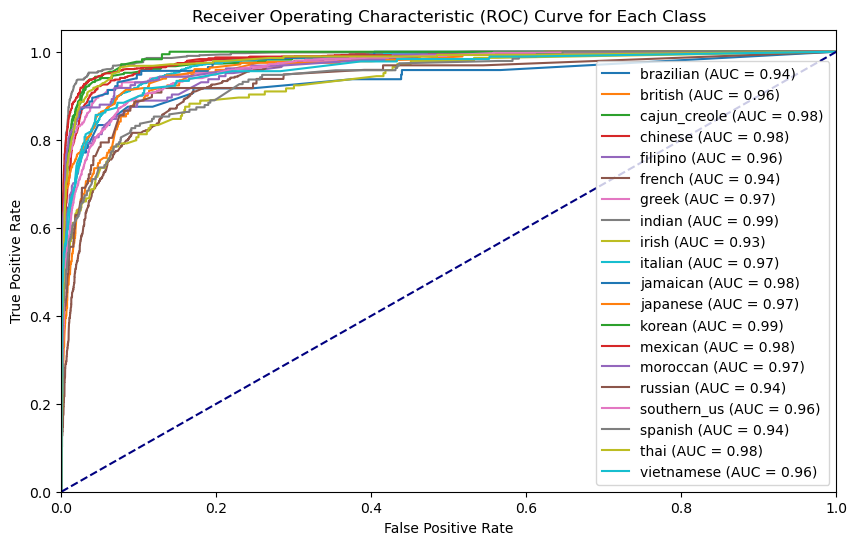

In [15]:
from sklearn.metrics import roc_curve, auc

y_probability = rf_classifier2.predict_proba(x_test_bow)

classes = len(rf_classifier.classes_)
plt.figure(figsize=(10, 6))

for i in range(classes):
    fpr, tpr, _ = roc_curve(y_test == rf_classifier2.classes_[i], y_probability[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{rf_classifier2.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()